TF version: 2.18.0
Training set: (50000, 32, 32, 3) (50000, 1)
Test set: (10000, 32, 32, 3) (10000, 1)


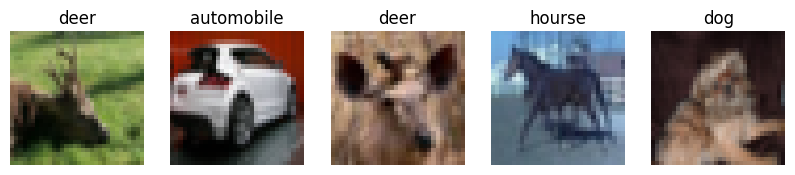

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("TF version:",tf.__version__)


#download CIFAR-10
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Training set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

class_names = ['airplane', 'automobile','bird', 'cat', 'deer', 'dog','frog','hourse','ship', 'truck']
plt.figure(figsize=(10,2))
for i in range(5):
  idx = np.random.randint(0, len(x_train))
  plt.subplot(1,5,i+1)
  plt.imshow(x_train[idx])
  plt.title(class_names[y_train[idx][0]])
  plt.axis('off')
plt.show()


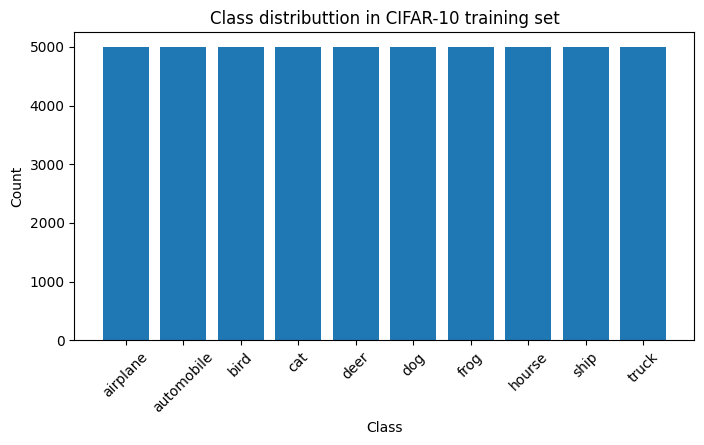

Class counts: {'airplane': np.int64(5000), 'automobile': np.int64(5000), 'bird': np.int64(5000), 'cat': np.int64(5000), 'deer': np.int64(5000), 'dog': np.int64(5000), 'frog': np.int64(5000), 'hourse': np.int64(5000), 'ship': np.int64(5000), 'truck': np.int64(5000)}


In [6]:
import numpy as np
import matplotlib.pyplot as plt
class_counts = np.bincount(y_train.flatten())

plt.figure(figsize=(8,4))
plt.bar(class_names,class_counts)
plt.title("Class distributtion in CIFAR-10 training set")
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print('Class counts:',dict(zip(class_names,class_counts)))


In [7]:
from tensorflow.keras.utils import  to_categorical

x_train_norm = x_train.astype('float32')/255.0
x_test_norm = x_test.astype('float32')/255.0

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

print("x_train_norm shape:", x_train_norm.shape)
print('y_train_cat shape:', y_train_cat.shape)

x_train_norm shape: (50000, 32, 32, 3)
y_train_cat shape: (50000, 10)


In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Flatten(input_shape=(32,32,3)), # “Unfolding” 32x32x3 into a vector
    layers.Dense(512, activation='relu'), # Hidden layer
    layers.Dense(10, activation='softmax') # Output: 10 classes
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train model
history = model.fit(
    x_train_norm, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.1,   # 10% data to validation
    verbose=2
)


Epoch 1/10
352/352 - 5s - 15ms/step - accuracy: 0.3126 - loss: 1.9894 - val_accuracy: 0.3676 - val_loss: 1.8011
Epoch 2/10
352/352 - 2s - 4ms/step - accuracy: 0.3825 - loss: 1.7426 - val_accuracy: 0.3834 - val_loss: 1.7336
Epoch 3/10
352/352 - 2s - 6ms/step - accuracy: 0.4084 - loss: 1.6681 - val_accuracy: 0.3980 - val_loss: 1.6832
Epoch 4/10
352/352 - 1s - 4ms/step - accuracy: 0.4252 - loss: 1.6255 - val_accuracy: 0.4330 - val_loss: 1.6113
Epoch 5/10
352/352 - 1s - 3ms/step - accuracy: 0.4389 - loss: 1.5760 - val_accuracy: 0.4402 - val_loss: 1.5726
Epoch 6/10
352/352 - 1s - 3ms/step - accuracy: 0.4480 - loss: 1.5535 - val_accuracy: 0.4270 - val_loss: 1.6055
Epoch 7/10
352/352 - 1s - 3ms/step - accuracy: 0.4574 - loss: 1.5260 - val_accuracy: 0.4500 - val_loss: 1.5409
Epoch 8/10
352/352 - 1s - 4ms/step - accuracy: 0.4648 - loss: 1.5033 - val_accuracy: 0.4594 - val_loss: 1.5296
Epoch 9/10
352/352 - 1s - 3ms/step - accuracy: 0.4724 - loss: 1.4840 - val_accuracy: 0.4550 - val_loss: 1.5308


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers


(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize data (bring pixels to the range [0, 1])
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0

# One-hot encoding for classes
num_classes = 10
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

print("x_train_norm shape:", x_train_norm.shape)
print("y_train_cat shape:", y_train_cat.shape)


x_train_norm shape: (50000, 32, 32, 3)
y_train_cat shape: (50000, 10)


In [23]:
'''
 Converged Neural Network Architecture (CNN)
'''
from tensorflow import keras
from tensorflow.keras import layers, Model

# 1. Define input
input_layer = keras.Input(shape=(32, 32, 3))

# 2. Stack layers
x = layers.Conv2D(32, (3, 3), activation='relu')(input_layer)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
output_layer = layers.Dense(10, activation='softmax')(x)

# 3. Create model
model_cnn = Model(inputs=input_layer, outputs=output_layer)

# 4. Compile model
model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 5.
model_cnn.summary()



Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 - 6s - 19ms/step - accuracy: 0.3993 - loss: 1.6714 - val_accuracy: 0.4741 - val_loss: 1.4550
Epoch 2/10
313/313 - 2s - 6ms/step - accuracy: 0.5291 - loss: 1.3278 - val_accuracy: 0.5573 - val_loss: 1.2595
Epoch 3/10
313/313 - 2s - 8ms/step - accuracy: 0.5832 - loss: 1.1868 - val_accuracy: 0.5916 - val_loss: 1.1723
Epoch 4/10
313/313 - 2s - 5ms/step - accuracy: 0.6227 - loss: 1.0848 - val_accuracy: 0.6059 - val_loss: 1.1323
Epoch 5/10
313/313 - 2s - 8ms/step - accuracy: 0.6535 - loss: 1.0038 - val_accuracy: 0.6394 - val_loss: 1.0506
Epoch 6/10
313/313 - 3s - 8ms/step - accuracy: 0.6718 - loss: 0.9454 - val_accuracy: 0.6234 - val_loss: 1.0960
Epoch 7/10
313/313 - 2s - 5ms/step - accuracy: 0.6866 - loss: 0.8976 - val_accuracy: 0.6669 - val_loss: 0.9714
Epoch 8/10
313/313 - 3s - 9ms/step - accuracy: 0.7042 - loss: 0.8565 - val_accuracy: 0.6778 - val_loss: 0.9360
Epoch 9/10
313/313 - 2s - 7ms/step - accuracy: 0.7158 - loss: 0.8226 - val_accuracy: 0.6784 - val_loss: 0.9303


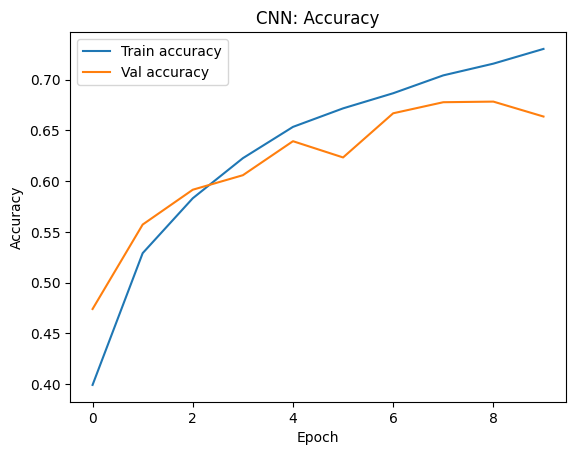

In [24]:
# Training a convolutional neural network
history_cnn = model_cnn.fit(
    x_train_norm, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)

# Accuracy assessment on test data
test_loss, test_acc = model_cnn.evaluate(x_test_norm, y_test_cat, verbose=2)
print(f"🧪 Test accuracy (CNN): {test_acc:.4f}, loss: {test_loss:.4f}")

# Visualization of learning dynamics
plt.plot(history_cnn.history['accuracy'], label='Train accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Val accuracy')
plt.title('CNN: Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


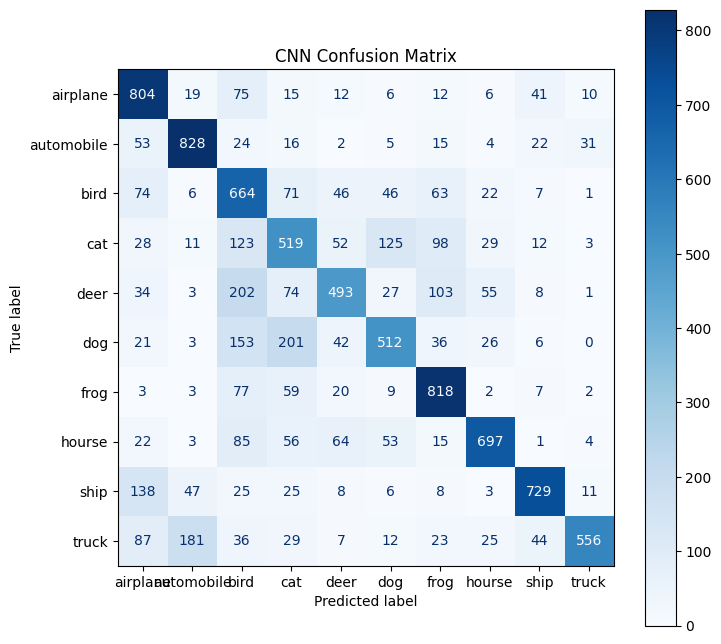

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#  (CNN)
y_pred_cnn = model_cnn.predict(x_test_norm)
y_pred_classes = y_pred_cnn.argmax(axis=1)
y_true = y_test_cat.argmax(axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=True)
plt.title("CNN Confusion Matrix")
plt.show()


0 input_layer_2 <class 'keras.src.layers.core.input_layer.InputLayer'>
1 conv2d_2 <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
2 max_pooling2d_2 <class 'keras.src.layers.pooling.max_pooling2d.MaxPooling2D'>
3 conv2d_3 <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
4 max_pooling2d_3 <class 'keras.src.layers.pooling.max_pooling2d.MaxPooling2D'>
5 flatten_2 <class 'keras.src.layers.reshaping.flatten.Flatten'>
6 dense_4 <class 'keras.src.layers.core.dense.Dense'>
7 dense_5 <class 'keras.src.layers.core.dense.Dense'>
Shape of filters: (3, 3, 3, 32)


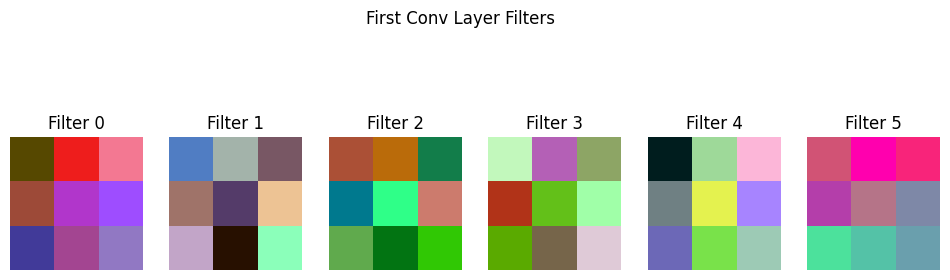

In [27]:
# Find the index of the first Conv2D layer
for i, layer in enumerate(model_cnn.layers):
    print(i, layer.name, type(layer))

# Usually Conv2D is layer number 1 (if input=0)
filters, biases = model_cnn.layers[1].get_weights()
print("Shape of filters:", filters.shape)  # should be (3, 3, 3, 3, 32) for CIFAR-10

# visualisation
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 6, figsize=(12, 4))
for i in range(6):
    f = filters[:, :, :, i]
    f_min, f_max = f.min(), f.max()
    f = (f - f_min) / (f_max - f_min)
    axes[i].imshow(f)
    axes[i].set_title(f'Filter {i}')
    axes[i].axis('off')
plt.suptitle("First Conv Layer Filters")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


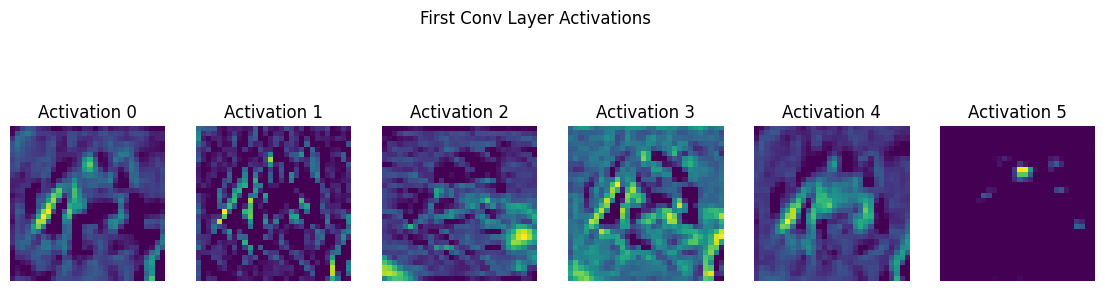

In [28]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

#Take a one pic
img = x_train_norm[0].reshape(1, 32, 32, 3)

# Create a model that outputs the activations of the first convolutional layer
activation_model = Model(inputs=model_cnn.input, outputs=model_cnn.layers[1].output)
activations = activation_model.predict(img)

# Visualize the first 6 feature maps
fig, axes = plt.subplots(1, 6, figsize=(14, 4))
for i in range(6):
    axes[i].imshow(activations[0, :, :, i], cmap='viridis')
    axes[i].set_title(f'Activation {i}')
    axes[i].axis('off')
plt.suptitle("First Conv Layer Activations")
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


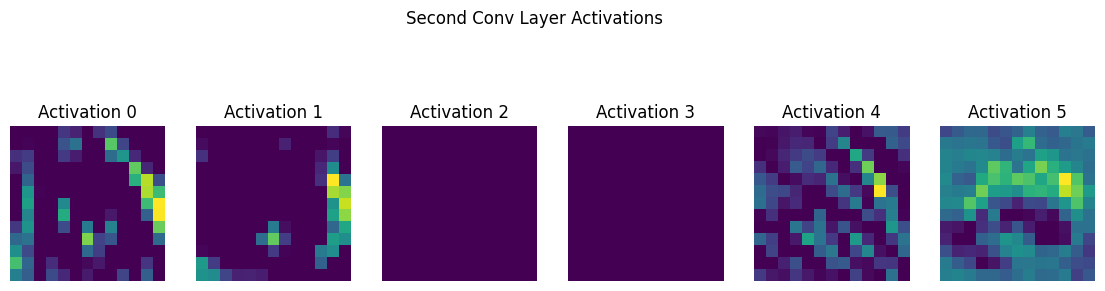

In [29]:
# Activate the second convolution layer (usually model_cnn.layers[3])
activation_model2 = Model(inputs=model_cnn.input, outputs=model_cnn.layers[3].output)
activations2 = activation_model2.predict(img)

fig, axes = plt.subplots(1, 6, figsize=(14, 4))
for i in range(6):
    axes[i].imshow(activations2[0, :, :, i], cmap='viridis')
    axes[i].set_title(f'Activation {i}')
    axes[i].axis('off')
plt.suptitle("Second Conv Layer Activations")
plt.show()


In [30]:
# CNN
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(x_test_norm, y_test_cat, verbose=2)

# MLP
test_loss_mlp, test_acc_mlp = model.evaluate(x_test_norm, y_test_cat, verbose=2)

print(f"CNN test accuracy: {test_acc_cnn:.4f}")
print(f"MLP test accuracy: {test_acc_mlp:.4f}")


313/313 - 1s - 3ms/step - accuracy: 0.6620 - loss: 0.9821
313/313 - 2s - 6ms/step - accuracy: 0.4731 - loss: 1.4858
CNN test accuracy: 0.6620
MLP test accuracy: 0.4731


In [32]:
history_mlp = model.fit(
    x_train_norm, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)


Epoch 1/10
313/313 - 2s - 7ms/step - accuracy: 0.4893 - loss: 1.4458 - val_accuracy: 0.4780 - val_loss: 1.4925
Epoch 2/10
313/313 - 2s - 5ms/step - accuracy: 0.4882 - loss: 1.4419 - val_accuracy: 0.4727 - val_loss: 1.4915
Epoch 3/10
313/313 - 1s - 4ms/step - accuracy: 0.4985 - loss: 1.4174 - val_accuracy: 0.4717 - val_loss: 1.5222
Epoch 4/10
313/313 - 1s - 4ms/step - accuracy: 0.5007 - loss: 1.4098 - val_accuracy: 0.4737 - val_loss: 1.4971
Epoch 5/10
313/313 - 1s - 5ms/step - accuracy: 0.5013 - loss: 1.4030 - val_accuracy: 0.4805 - val_loss: 1.4796
Epoch 6/10
313/313 - 1s - 4ms/step - accuracy: 0.5062 - loss: 1.3945 - val_accuracy: 0.4846 - val_loss: 1.4633
Epoch 7/10
313/313 - 1s - 4ms/step - accuracy: 0.5067 - loss: 1.3835 - val_accuracy: 0.4701 - val_loss: 1.5102
Epoch 8/10
313/313 - 1s - 4ms/step - accuracy: 0.5160 - loss: 1.3696 - val_accuracy: 0.4856 - val_loss: 1.4597
Epoch 9/10
313/313 - 1s - 3ms/step - accuracy: 0.5170 - loss: 1.3592 - val_accuracy: 0.4700 - val_loss: 1.5099
E

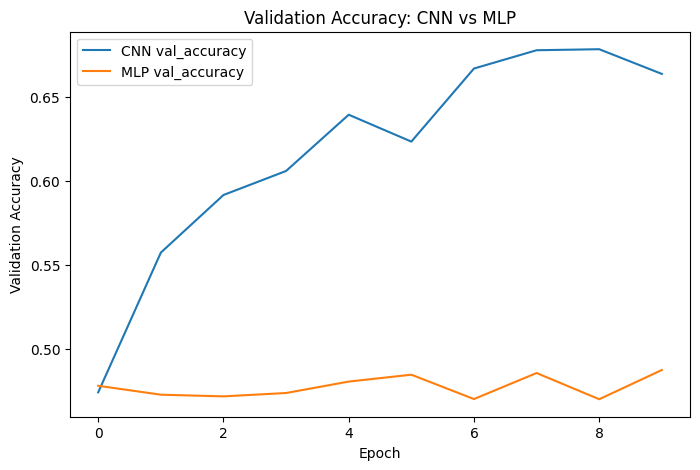

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history_cnn.history['val_accuracy'], label='CNN val_accuracy')
plt.plot(history_mlp.history['val_accuracy'], label='MLP val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy: CNN vs MLP')
plt.legend()
plt.show()


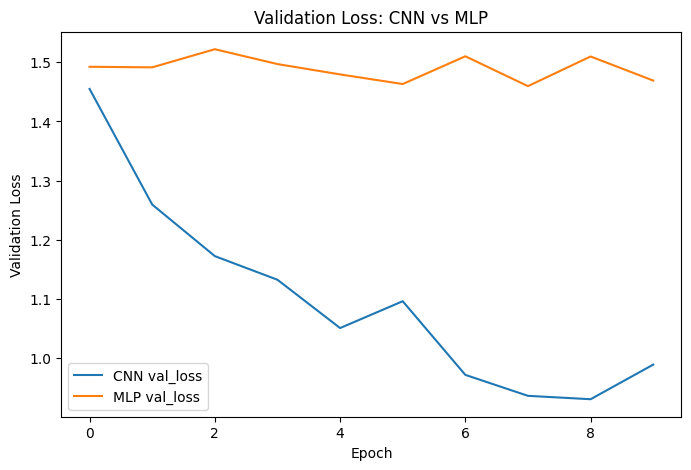

In [34]:
plt.figure(figsize=(8,5))
plt.plot(history_cnn.history['val_loss'], label='CNN val_loss')
plt.plot(history_mlp.history['val_loss'], label='MLP val_loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss: CNN vs MLP')
plt.legend()
plt.show()


In [35]:
# Save MLP-model
model.save('mlp_cifar10.h5')

# save CNN-model
model_cnn.save('cnn_cifar10.h5')